In [2]:
import os
import glob
from os import walk
import numpy as np
import pandas as pd

## Scan Through the UTK data folder to extract age&gender information

In [3]:
# scan the image names, which contains information of age, gender, and ethicity
f = []
# change the following link to the path where includes all the UTK uncroped faces
for (dirpath, dirnames, filenames) in walk(r'C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Total'):
    f.extend(filenames)
len(f)

24108

In [4]:
# Extract the information and make data table
infolist = []
for name in f:
    name1 = name
    if 'r45_' in name:
        name = name.lstrip('r45_')
    if 'r315_' in name:
        name = name.lstrip('r315_')
    name2 = name.strip('.jpg.chip.jpg')
    info = name2.split('_')
    info.append(name1)
    infolist.append(info)
df = pd.DataFrame(infolist, columns=['age', 'gender', 'race', 'date&time', 'filename'])
df.head()

,age,gender,race,date&time,filename
0,100,0,0,20170112213500903,100_0_0_20170112213500903.jpg
1,100,0,0,20170112215240346,100_0_0_20170112215240346.jpg
2,100,1,0,20170110183726390,100_1_0_20170110183726390.jpg
3,100,1,0,20170112213001988,100_1_0_20170112213001988.jpg
4,100,1,0,20170112213303693,100_1_0_20170112213303693.jpg


In [6]:
# check the length
df.dropna(inplace=True)
len(df)

24105

In [7]:
df = df.astype({'age':int, 'race':int})
df.dtypes

age           int32
gender       object
race          int32
date&time    object
filename     object
dtype: object

Text(0, 0.5, 'Count')

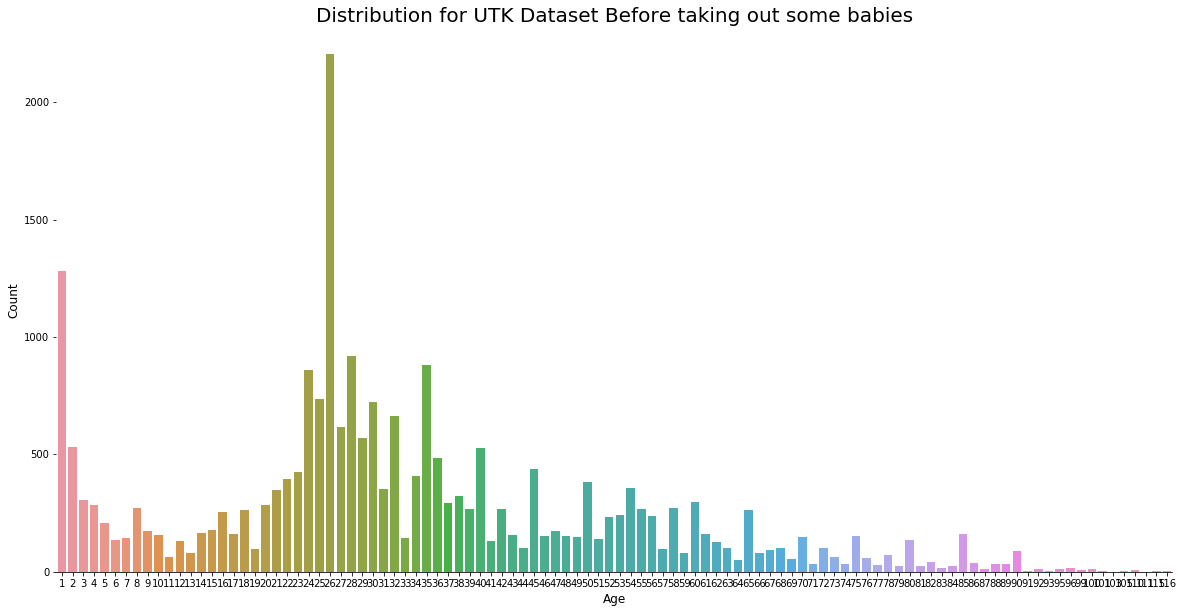

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.countplot(data=df, x ='age')
sns.despine(left=True)
#plt.xticks(rotation=90)
plt.title('Distribution for UTK Dataset Before taking out some babies', fontsize=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

## Cutting down the data that are 16 yrs old or younger

We see a good amont of data has age under 16 yrs old, but they are not likely to show up in front of the grocery store's check-out station, which conflicts our business focus and adding noice. So we take out 80% of these group to match the original weights, which train from Wiki database that do not contain many 16yrs olds or younger either.

In [9]:
len(df[df['age']<=16])

4368

In [10]:
df1 = df.drop(df[df['age']<=16].sample(frac=1).index).copy()
len(df1)

19737

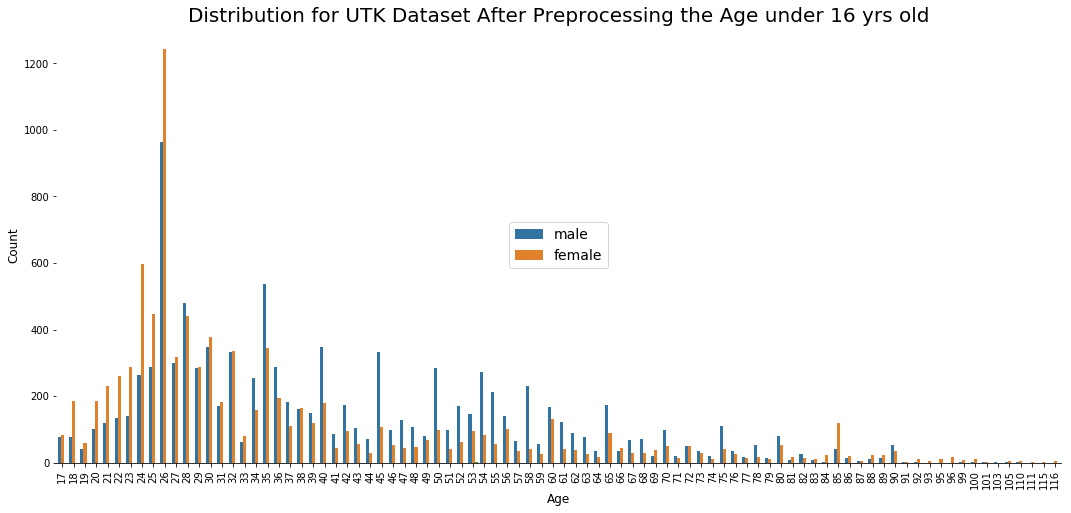

In [11]:
df1['gender'].replace('0', 'male', inplace=True)
df1['gender'].replace('1', 'female', inplace=True)

plt.figure(figsize=(18,8))
sns.countplot(data=df1, x ='age', hue='gender')
sns.despine(left=True)
plt.xticks(rotation=90)
plt.title('Distribution for UTK Dataset After Preprocessing the Age under 16 yrs old', fontsize=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(loc='center', fontsize=14)

Text(0, 0.5, 'Count')

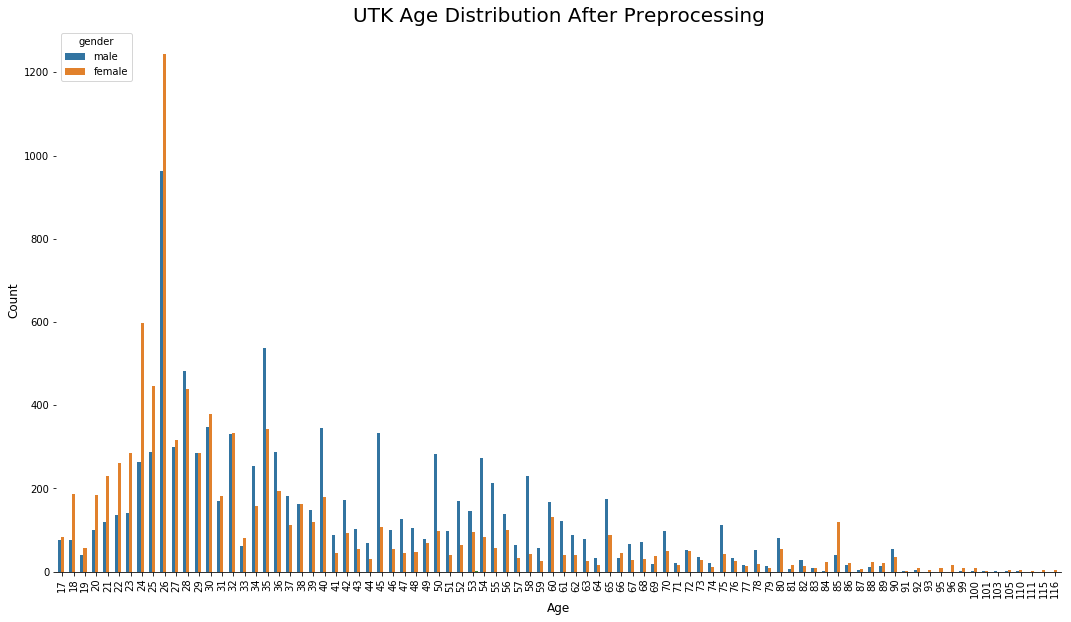

In [14]:
# Plot the age distribution for different gender
df_PlotGender = df1.copy()
df_PlotGender['gender'].replace({0:'female', 1:'male'}, inplace=True)

#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2 ,figsize=(20,8), sharey=True)
plt.figure(figsize=(18,10))
#sns.countplot(data=df_wiki2, x='age', hue='gender', ax=ax1)
sns.countplot(data=df_PlotGender, x ='age', hue='gender')
sns.despine(left=True)
plt.xticks(rotation=90)
#ax1.set_title('Wiki & IMDB Age Distribution Prior to Preprocessing', fontsize=20)
plt.title('UTK Age Distribution After Preprocessing', fontsize=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Others Age Distribution')

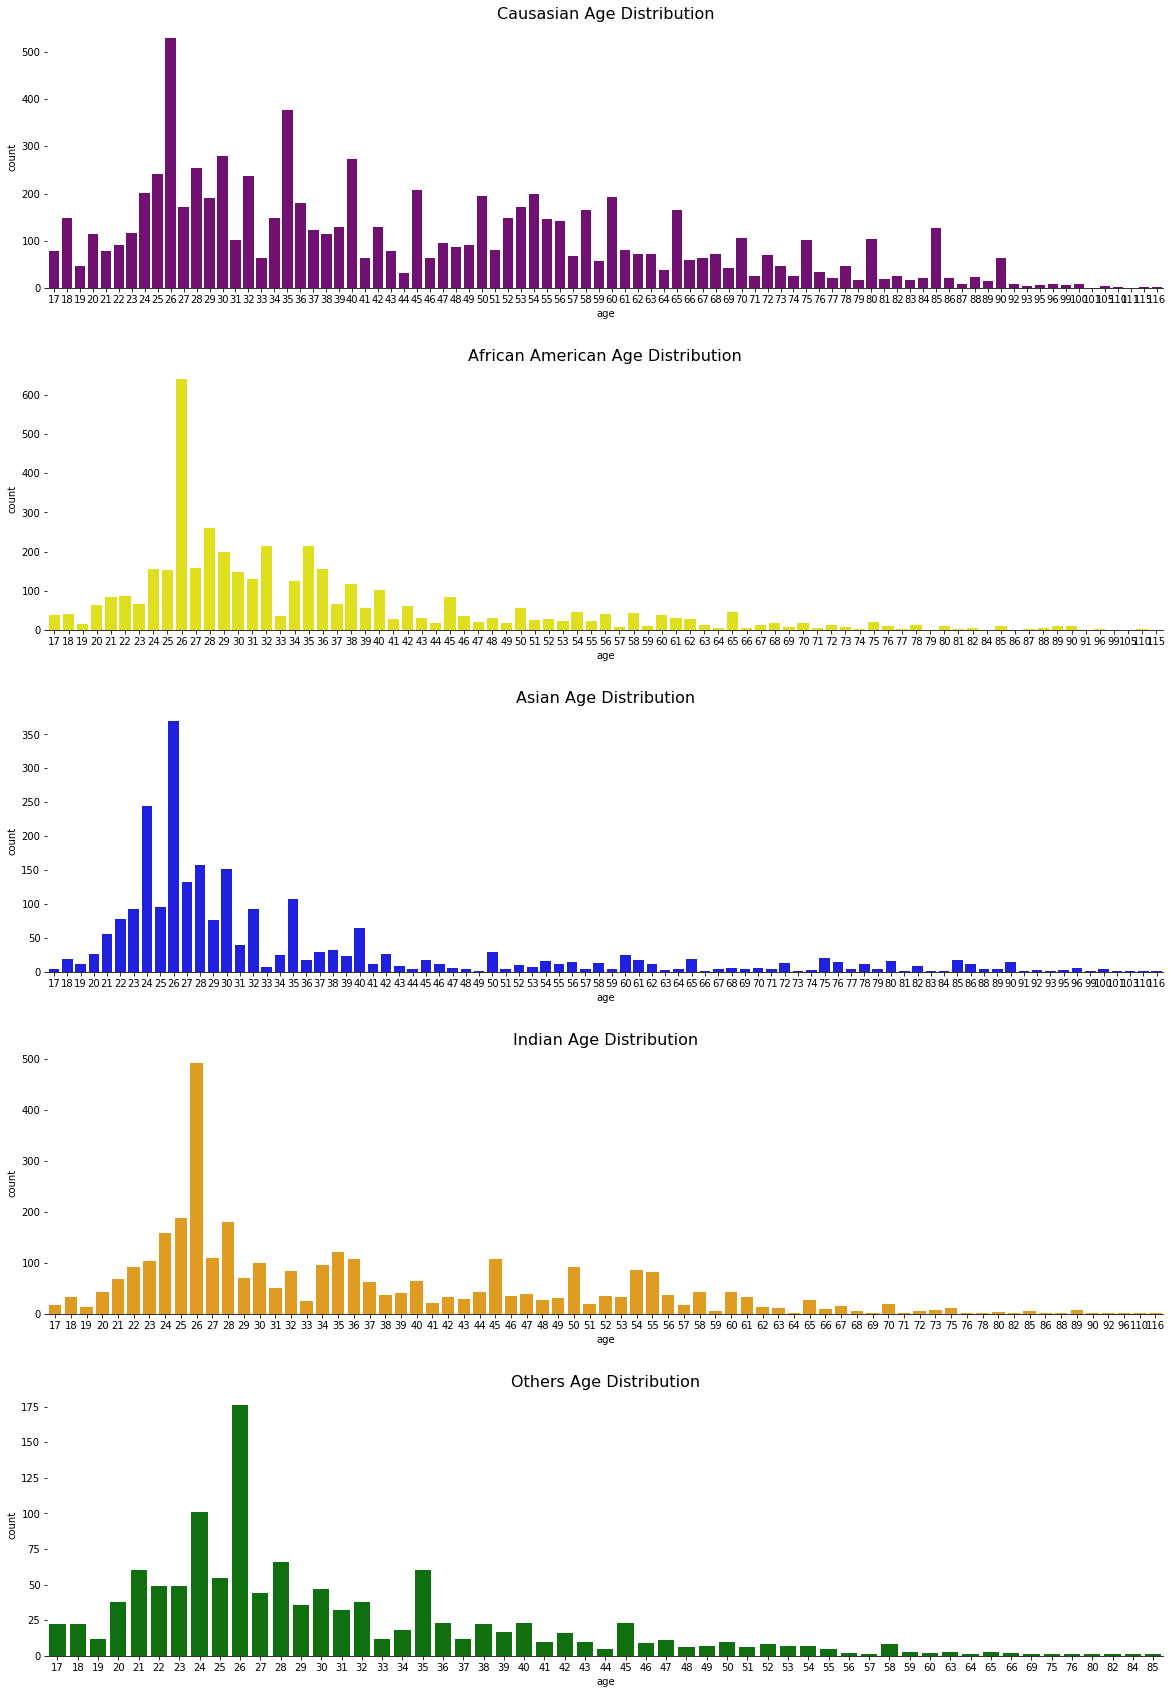

In [13]:
#White, Black, Asian, Indian, and Others
df_caucasian = df1[df1['race']==0]
df_africanamerican = df1[df1['race']==1]
df_asian = df1[df1['race']==2]
df_indian = df1[df1['race']==3]
df_others = df1[df1['race']==4]

# plot the graphs
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20,30))
sns.despine(left=True)
plt.subplots_adjust(hspace=0.3)
sns.countplot(data=df_caucasian, x ='age', ax=ax[0], color='purple')
ax[0].set_title('Causasian Age Distribution', fontsize=16)
sns.countplot(data=df_africanamerican, x ='age', ax=ax[1], color='yellow')
ax[1].set_title('African American Age Distribution', fontsize=16)
sns.countplot(data=df_asian, x ='age', ax=ax[2], color='blue')
ax[2].set_title('Asian Age Distribution', fontsize=16)
sns.countplot(data=df_indian, x ='age', ax=ax[3], color='orange')
ax[3].set_title('Indian Age Distribution', fontsize=16)
sns.countplot(data=df_others, x ='age', ax=ax[4], color='green')
ax[4].set_title('Others Age Distribution', fontsize=16)

In [ ]:
# Export the data table of different ethicites to desired path
df_caucasian.to_csv(r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Caucasian_no16.csv", 
                    index=False)
df_africanamerican.to_csv(r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Africana_no16.csv",
                         index=False)
df_asian.to_csv(r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Asian_no16.csv", 
               index=False)
df_indian.to_csv(r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Indian_no16.csv", 
                index=False)
df_others.to_csv(r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\Data\UTK Data\Others_no16.csv", 
                index=False)

In [15]:
# Export the data table to desired path
desired_path_UTKall = r"C:\Users\zouqi\Python\MIS 381 Adv Predictive Modeling\Age Project\utkCrop_no16_rota.csv"
df1.to_csv(desired_path_UTKall, index=False)

In [17]:
df = pd.read_csv(desired_path_UTKall)
df['filename'].isna().sum()
len(df)

19737